# Create Figures
This script replicates figures shown in the research paper:

P. Pastoriza, I.G. Torre, F. Diéguez, I. Gomez, S. Gelado, J. Bello, A. Ávila, J. Matías, V. Pytell, A. Hernandez-Fernandez (2020) Speech pause distribution as an early marker for Alzheimer’s disease. Submitted.

Maintainer=Ivan G Torre | Contact=igonzalez@vicomtech.org


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import lognorm
from scipy import stats
import math
import os

# Crete folder
if not os.path.exists('figures'):
    os.mkdir('figures')
output_path = "figures/"

# 1. Interated Agreement

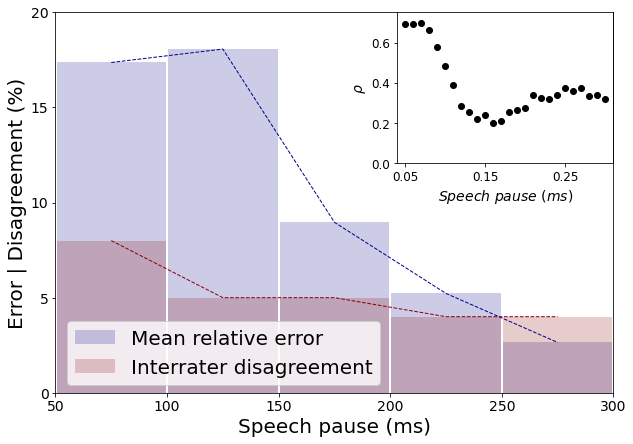

In [60]:
RelErrors = pd.read_csv("relative_error.csv", sep=",",  decimal=".")
IAgreement = pd.read_csv("agreement.csv", sep=",",  decimal=".")


# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.bar(RelErrors.lower_threshold+25, RelErrors.mean_rel_error*100, lw=4, width=49, alpha=0.2, color="darkblue", label="Mean relative error")
ax.plot(RelErrors.lower_threshold+25, RelErrors.mean_rel_error*100, "--", lw=1, alpha=1, color="darkblue")


ax.bar(IAgreement.lower_threshold+25, IAgreement.agreement*100, lw=4, width=49, alpha=0.2, color="darkred", label="Interrater disagreement")
ax.plot(IAgreement.lower_threshold+25, IAgreement.agreement*100, "--", lw=1, alpha=1, color="darkred")

ax.set_xlabel("Speech pause (ms)", fontsize=20)
ax.set_ylabel("Error | Disagreement (%)", fontsize=20)
ax.set_xlim([50, 300])
ax.set_ylim([0, 20])

ax.set_yticks([0, 5, 10, 15, 20])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.legend(loc = [0.02,0.02], fontsize=20)#, frameon=False)


# # SUBPLOT
cutoff = pd.read_csv("adjusts/cutoffselection.csv", sep=",",  decimal=".")



subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
subax.plot(cutoff.thresholds, cutoff.mean_statistic, "o", lw=2, color="black")

subax.set_xlim([0.04, 0.31])
subax.set_xticks([0.05, 0.15, 0.25])

subax.set_yticks([0, 0.2, 0.4, 0.6])
subax.set_ylim([0, .75])

subax.tick_params(axis='x', labelsize=12)
subax.tick_params(axis='y', labelsize=12)

subax.set_ylabel(r"$\rho$", fontsize=14)
subax.set_xlabel(r"$Speech$ $pause$ $(ms)$", fontsize=14)

#subax.set_ylabel("Error | Disagreement (%)", fontsize=20)


f.savefig(output_path + "InterratedAgreement.pdf", bbox_inches='tight')


## Import data

In [3]:
dataRaw = pd.read_csv("listaPausasUmral50_FINAL.csv", sep=",",  decimal=".")

dataRaw = dataRaw[dataRaw.durPausa>0.16]
#dataRaw = dataRaw[dataRaw.duration<4]

alldata = dataRaw.durPausa.values
#alldata = alldata[alldata<3]

HC = dataRaw[dataRaw["Diagnóstico"] == "HC"].durPausa.values
amdMCIr = dataRaw[dataRaw["Diagnóstico"] == "a-mdMCI-R"].durPausa.values
amdMCIe = dataRaw[dataRaw["Diagnóstico"] == "a-mdMCI-E"].durPausa.values
AD = dataRaw[dataRaw["Diagnóstico"] == "AD"].durPausa.values


# Crete folder
if not os.path.exists('figures'):
    os.mkdir('figures')
output_path = "figures/"


# 2.- Figure 1. Subplots of data fit to LND

## 2.1.- LND fit values

In [5]:
x=np.linspace(0.16, 4, 500)

# Parameters obtained with the script FitData.R
LN_HC = stats.lognorm(scale=math.exp(-0.558772342739212), s= 0.757683415997054)
LN_amdMCIr = stats.lognorm(scale=math.exp(-0.509716171297987), s=0.857078802316301)
LN_amdMCIe = stats.lognorm(scale=math.exp(-0.424997663093382), s=0.862979947124405)
LN_AD = stats.lognorm(scale=math.exp(-0.362875611037089), s= 0.924543496101887)


### Fit to histogram CS 

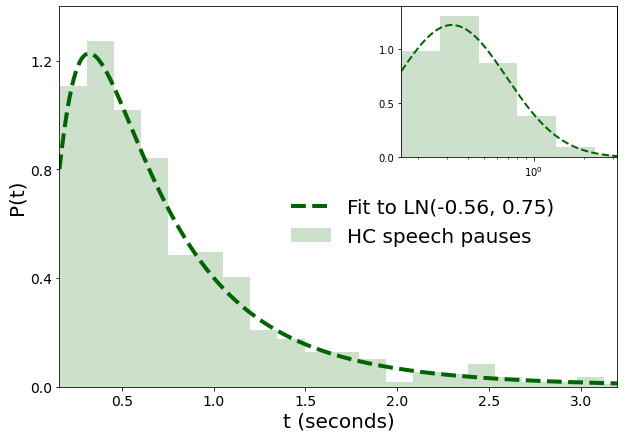

In [6]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(HC, density=True, bins=30, label = "HC speech pauses", color="darkgreen", alpha=0.2)
ax.plot(x, LN_HC.pdf(x), "--", lw=4, label = "Fit to LN(-0.56, 0.75)",color="darkgreen",)


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.16, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.16),np.log10(4.0), 7)
subax.hist(HC, density=True, bins=bins10, color="darkgreen", alpha=0.2)
subax.plot(x, LN_HC.pdf(x), "--", lw=2, color="darkgreen")

subax.set_xscale("log")
subax.set_xlim([0.16, 3.2])
subax.set_yticks([0, 0.5, 1])
subax.set_ylim([0, 1.4])


f.savefig(output_path + "HC_Fits.pdf", bbox_inches='tight')

### Adjust to histogram a-mdMCI-R 

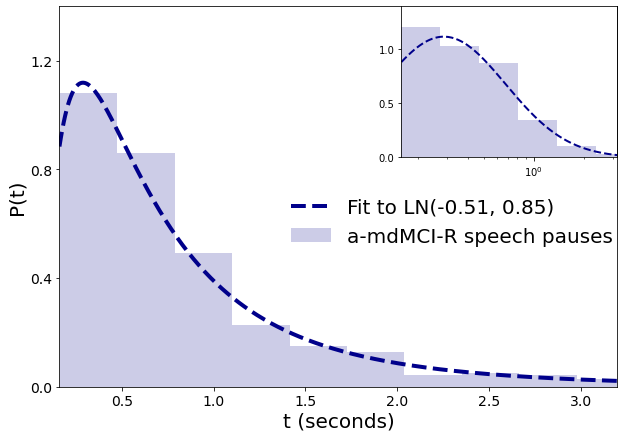

In [7]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(amdMCIr, density=True, bins=30, label = "a-mdMCI-R speech pauses", color="darkblue", alpha=0.2)
ax.plot(x, LN_amdMCIr.pdf(x), "--", lw=4, label = "Fit to LN(-0.51, 0.85)",color="darkblue",)


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.16, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.16), np.log10(4.1), 7)
subax.hist(amdMCIr, density=True, bins=bins10, color="darkblue", alpha=0.2)
subax.plot(x, LN_amdMCIr.pdf(x), "--", lw=2, color="darkblue")

subax.set_xscale("log")
subax.set_xlim([0.16, 3.2])
subax.set_ylim([0, 1.4])
subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "a-mdMCI-R_Fits.pdf", bbox_inches='tight')

### Adjust to histogram a-mdMCI-E

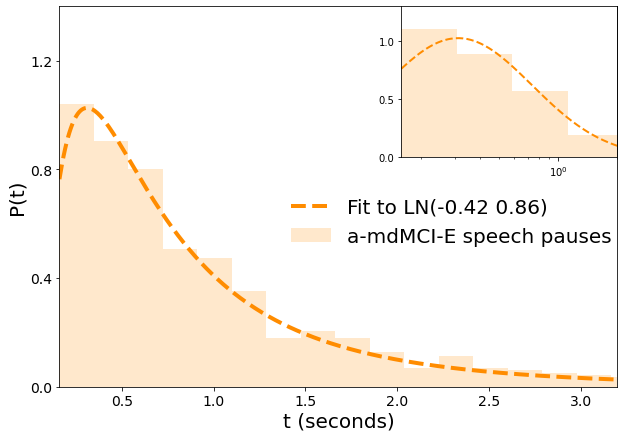

In [8]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(amdMCIe, density=True, bins=30, label = "a-mdMCI-E speech pauses", color="darkorange", alpha=0.2)
ax.plot(x, LN_amdMCIe.pdf(x), "--", lw=4, label = "Fit to LN(-0.42 0.86)",color="darkorange")


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.16, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.16),np.log10(4.1), 6)
subax.hist(amdMCIe, density=True, bins=bins10, color="darkorange", alpha=0.2)
subax.plot(x, LN_amdMCIe.pdf(x), "--", lw=2, color="darkorange")

subax.set_xscale("log")
subax.set_xlim([0.16, 2])
subax.set_ylim([0, 1.3])
subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "a-mdMCI-E_Fits.pdf", bbox_inches='tight')

### Adjust to histogram DTA 

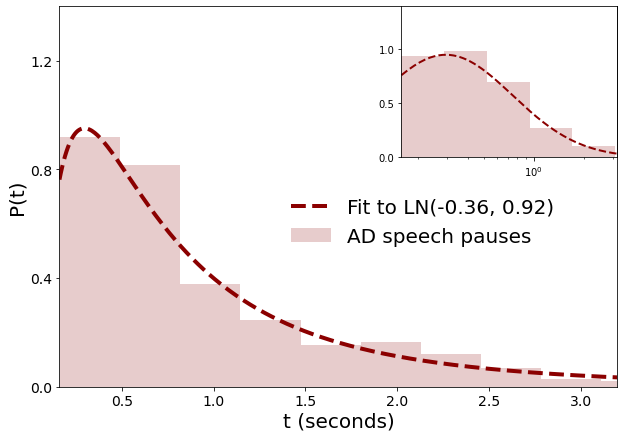

In [9]:
# MAIN PLOT
f, ax = plt.subplots(figsize=[10,7])
ax.hist(AD, density=True, bins=40, label = "AD speech pauses", color="darkred", alpha=0.2)
ax.plot(x, LN_AD.pdf(x), "--", lw=4, label = "Fit to LN(-0.36, 0.92)",color="darkred")


ax.set_xlabel("t (seconds)", fontsize=14)
ax.set_ylabel("P(t)", fontsize=14)
# ax.set_xscale("log")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)
ax.set_xlim([0.16, 3.2])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.4,0.35], fontsize=20, frameon=False)
ax.set_yticks([0, 0.4, 0.8, 1.2])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)



# # SUBPLOT
subax = plt.axes([ax.get_position().x1 - .3, ax.get_position().y1 - .3, .3, .3])
bins10=np.logspace(np.log10(0.16),np.log10(3.1), 6)
subax.hist(AD, density=True, bins=bins10, color="darkred", alpha=0.2)
subax.plot(x, LN_AD.pdf(x), "--", lw=2, color="darkred")

subax.set_xscale("log")
subax.set_xlim([0.16, 3.2])
subax.set_ylim([0, 1.4])

subax.set_yticks([0, 0.5, 1])


f.savefig(output_path + "AD_Fits.pdf", bbox_inches='tight')

# 3.- Figure 2. LND comparison

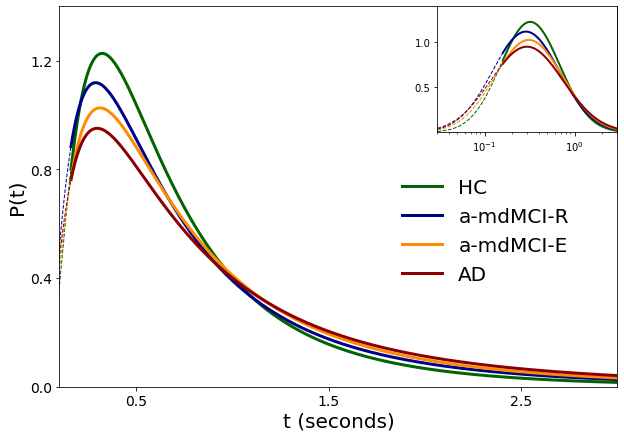

In [10]:
x2=np.linspace(0.03, 0.16, 500)

# # MAIN PLOT

f,ax = plt.subplots(figsize=[10,7])
ax.plot(x, LN_HC.pdf(x), lw = 3, label="HC", c="darkgreen")
ax.plot(x, LN_amdMCIr.pdf(x), lw = 3, label="a-mdMCI-R", c="darkblue")
ax.plot(x, LN_amdMCIe.pdf(x), lw = 3, label="a-mdMCI-E", c="darkorange")
ax.plot(x, LN_AD.pdf(x), lw = 3, label= "AD", c= "darkred")

ax.plot(x2, LN_HC.pdf(x2), '--',lw = 1, c="darkgreen")
ax.plot(x2, LN_amdMCIr.pdf(x2),'--', lw = 1, c="darkblue")
ax.plot(x2, LN_amdMCIe.pdf(x2),'--', lw = 1, c="darkorange")
ax.plot(x2, LN_AD.pdf(x2),'--', lw = 1, c= "darkred")

ax.set_xlabel("t (seconds)", fontsize=20)
ax.set_ylabel("P(t)", fontsize=20)

ax.set_xlim([0.1, 3])
ax.set_ylim([0, 1.4])

ax.legend(loc = [0.6,0.25], fontsize=20, frameon=False)

ax.set_xticks([0.5, 1.5, 2.5])
ax.set_yticks([0, 0.4, 0.8, 1.2])

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)


# # SUBPLOT

subax = plt.axes([ax.get_position().x1 - .25, ax.get_position().y1 - .25, .25, .25])
subax.plot(x, LN_HC.pdf(x), lw = 2, c="darkgreen")
subax.plot(x, LN_amdMCIr.pdf(x), lw = 2, c="darkblue")
subax.plot(x, LN_amdMCIe.pdf(x), lw = 2, c="darkorange")
subax.plot(x, LN_AD.pdf(x), lw = 2, c= "darkred")

subax.plot(x2, LN_HC.pdf(x2), '--',lw = 1, c="darkgreen")
subax.plot(x2, LN_amdMCIr.pdf(x2),'--', lw = 1, c="darkblue")
subax.plot(x2, LN_amdMCIe.pdf(x2),'--', lw = 1, c="darkorange")
subax.plot(x2, LN_AD.pdf(x2),'--', lw = 1, c= "darkred")

subax.set_yticks([0.5,1])
subax.set_xlim([0.03, 3])
subax.set_ylim([0, 1.4])

subax.set_xscale("log")

f.savefig(output_path + "LN_Fits.pdf", bbox_inches='tight')

